# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начал проект с описания.
</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

data = pd.read_csv(
    '/Users/macbookair/Yandex.Disk.localized/01_Data_analyst/GitHub/DA_yandex_project_datasets/03_real_estate_data.csv', 
    sep='\t'
)
                   
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

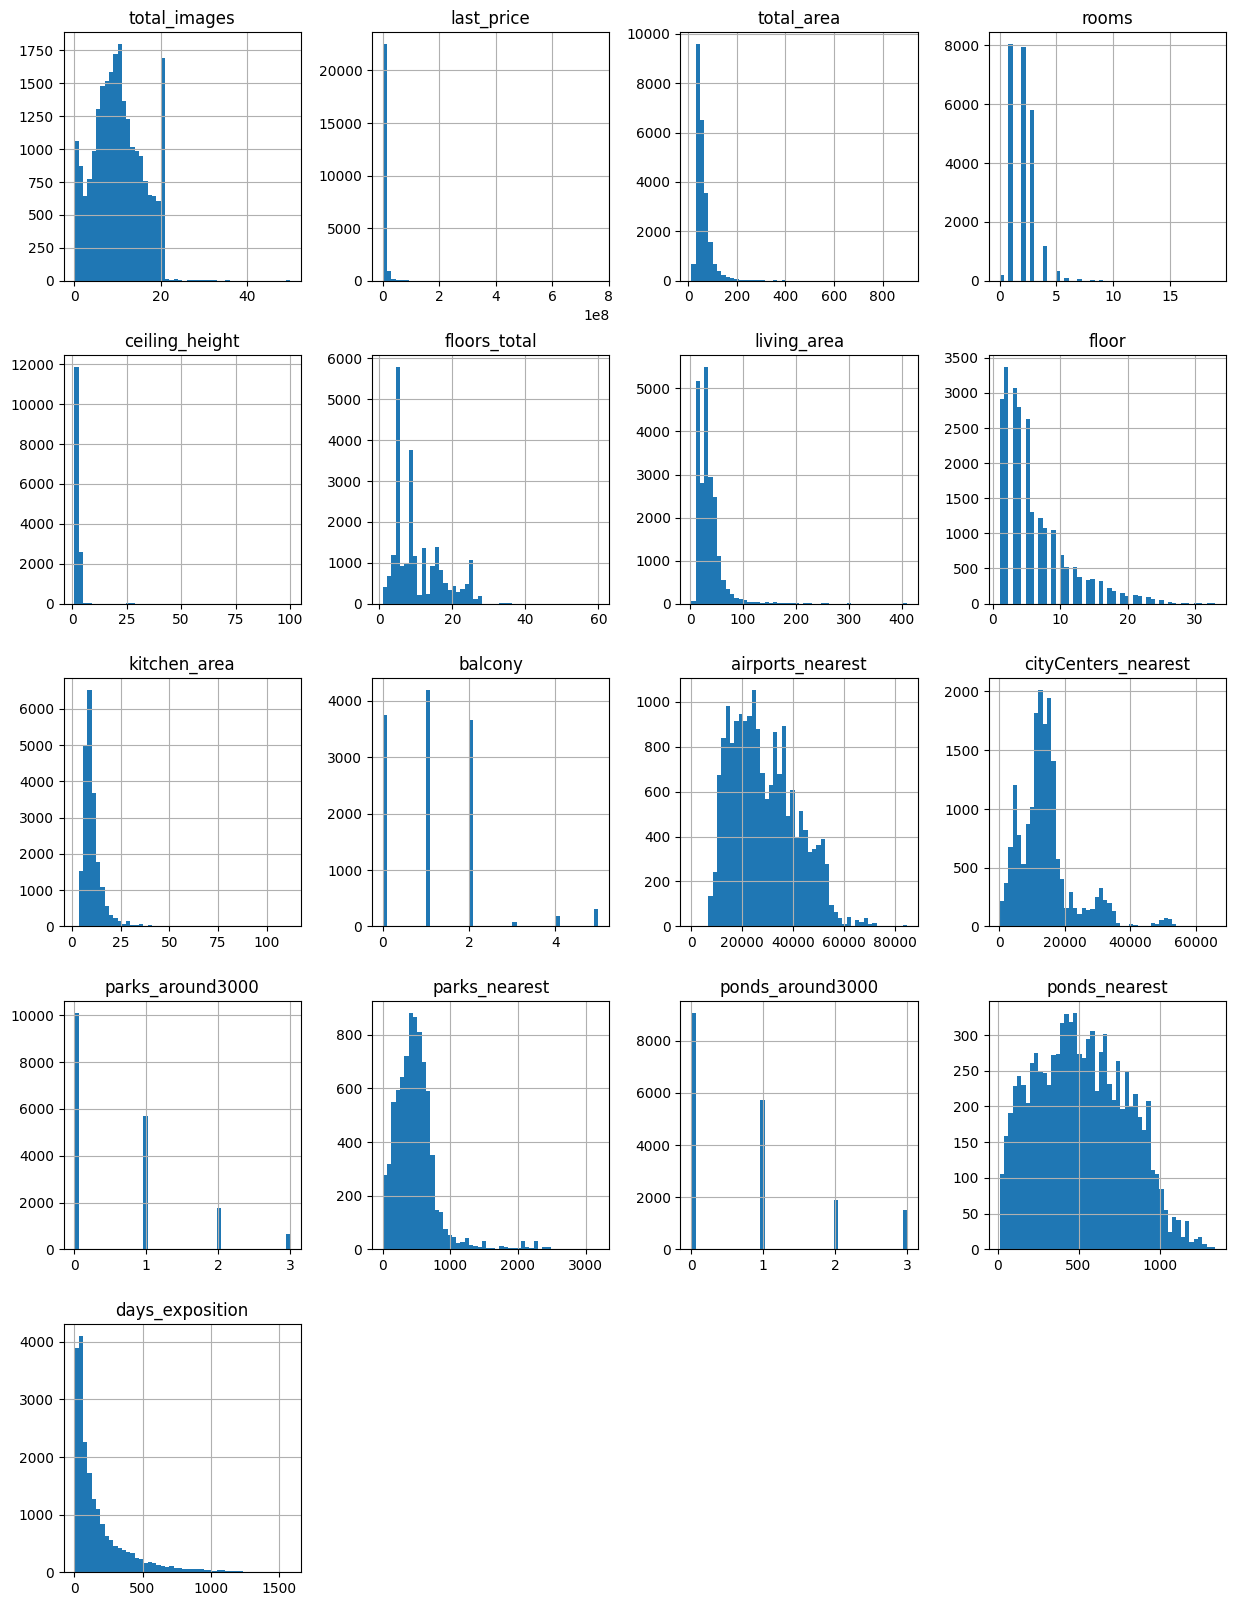

In [2]:
data.hist(bins=50, figsize=(15, 20))

#### Вывод:
- На первый взгляд каждая колонка имеет вполне понятное значения, но кое что придется доработать. Например цену квартир удобнее воспринимать в тыс.руб. Расстояние в километрах. Некоторые целые значения (кол-во дней экспозиции, балконов, комнат) указаны как дробные числа. Их мы обработаем в целые.
- Присутствует много пропусков. Далее нам предстоит выянить, какие пропуски мы логически можем заполнить, а какие заменить средним. Какие нам нужны для корректного отчета, а какие мы можем оставить как есть.
- По гистограммам мы можем сделаь следующие выводы:
    - Столбец total_images имеет резкий второй пик примерно на кол-ве фотографий 20шт. Таких значений 
    - floors_total имеет неравномерное распределение, но скорее всего этосвязано с тем, что мы рассматриваем весь город и область.

### Предобработка данных

#### Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_earest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

#### Поиск и изучение пропусков

In [3]:
data.describe() #Общая инфрмация по данным

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По общей информации о дата сете `describe()` сразу настораживает что за 19 комнатная квартира площадью 900м2, и с потолком 100м. Будем выяснять.

Посмотрим как дела обстоят с пропусками значений:

                  index  count_nan  процент_пропусков
0          is_apartment      20924          88.290645
1         parks_nearest      15620          65.909954
2         ponds_nearest      14589          61.559559
3               balcony      11519          48.605426
4        ceiling_height       9195          38.799105
5      airports_nearest       5542          23.384953
6   cityCenters_nearest       5519          23.287902
7      ponds_around3000       5518          23.283683
8      parks_around3000       5518          23.283683
9       days_exposition       3181          13.422507
10         kitchen_area       2278           9.612220
11          living_area       1903           8.029875
12         floors_total         86           0.362885
13        locality_name         49           0.206760


<AxesSubplot:xlabel='index'>

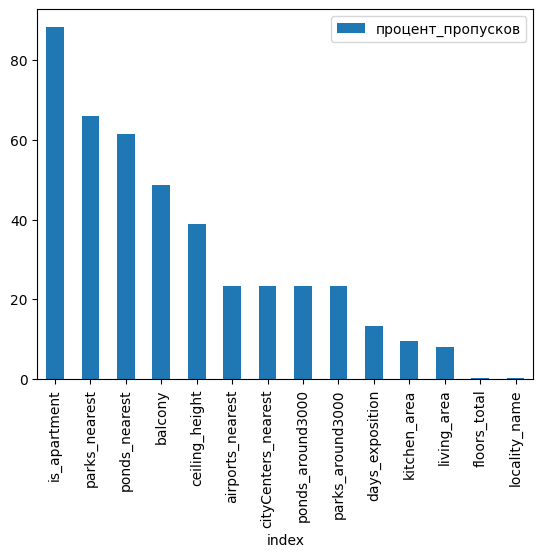

In [4]:
data_nan = pd.DataFrame(data=data.isna().sum().sort_values(ascending=False).loc[data.isna().sum() > 0],
                 columns=['count_nan']).reset_index(drop=False) # создаем дата фрейм, с количеством пропущенных значений, убираем из ДФ название столбцов, где пропусков нет, сортируем по уьыванию

data_nan['процент_пропусков'] = data_nan['count_nan'] / data.shape[0] * 100 # Добавляем новый стобец, отражающий долю пропусков в данных
print(data_nan)
data_nan.plot(y='процент_пропусков', x='index', kind='bar')

Лидер по пропускам - данные об апартаментах. 88 % это очень много. Также стоит обратить на жолю пропусков по значениям: `airports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000` они практически равны. Складывается впечатление что часть данных потеряна по 23% квартир. 

Данные разделяются на 2 типа:
- добавленные пользователем (площадь квартиры, её этаж и количество балконов)
- картографические (расстояния до центра города, аэропорта и ближайшего парка)

#### Предположения
- is_apartment составляет 88% пропусков. Данные составляют булев тип данных. 
    - Предположим что не указанные данные, это - 0 (не апарт) тогда получается на выборку в `data.shape[0]` = 23 699 квартир, всего `data[data['is_apartment'] == True]['is_apartment'].count()` = 50 квартир. При условии что в выборке 66% объектов это квартиры в СпБ `data[data['locality_name'] == 'Санкт-Петербург'].count()['locality_name'] / data.shape[0]` - данное предположение не возможно. Оставим как есть.
- parks_nearest, ponds_nearest - Если эти значения заполняли пользователи, то многие вероятно их просто пропустили, как не значимые критерии, или просто изза того что не вкурсе сколько метров до парка или водоема. Если данные заполнялись исходя из локации, вероятно выгрузка данных произошла с ошибкой. В любом случае, эти данные не сильно влияют на стоимость за м2 и на ликвидность. Оставим как есть.
- balcony - В данной ситуации все просто. Булево значение. Если есть балкон - "1", если пользователь ничего не отметил, значит нет балконов - "0". Заменим пропуски на значение "0"
- ceiling_height - Высота потолков. 38% не указали. Большое колличество. Но легко объяснить. Многи в принципе не знаю сколько у них точная высота потолков, и пропускают это значение как не критичное. В СПБ много старого фонда, где потолки под 4 метра. Новые дома и хрущевки строились с меньшим размахом. Заполним пропущенные значения средним значением по населенному пункту.
- airports_nearest, cityCenters_nearest - Расстояние до Аэропорта, о центра. Достаточно важная информация, которая влияет на стоимость и ликвидность. Попробуем заполнить пропуски медианным значениям расстояния, по сгруппированным названиям поселка.
- ponds_around3000, parks_around3000 - аналогично с parks_nearest, ponds_nearest. Пропуски в данных оставим как есть.
- days_exposition - Данные могут отсутствовать по причине ттого, что на площадке квартира еще в продаже. Часто бывает что объявление просто висит. Об этом же говорит максимально значение продажи квартиры в 4 года в данных. В любом случае выдумать или усреднить данные по сроку экспозиции мы не можем. Оставим как есть.
- kitchen_area, living_area - Пропусков немного и они не критичны. Не заполнены по причине того, что не слишком важный параметр, поэтому его упускают и риэлторы и собственники. Главное общая площадь указана! параметр total_area как раз не имеет пропусков. Потому как модерация без этого параметра не возможна.
- floors_total - Общее кол-во этажей. Пропусков мало, и не заполнены данные по той же причине вероятно, что и площадь кухни и жилая площадь. По причине не значимости данного параметра для продавца. Сейчас чаще всего при заполнении объявления, площадка уже знает про этот дом некоторую информацию и самостоятельно подставляет этажность дома. + некоторые дома в СПБ - переменной этажности, может быть в этом причина) Оставим этот параметр как есть.
- locality_name - Название населенного пункта очень важно для нас. Логично было бы предположить, что если отсутствует название населенного пункта, значит система не может рассчитать расстояние до центра и до аэропорта. Взглянув на `data.['locality_name']` можно сказать что есть квартиры, в которых наше предположение не работает. Видимо отсутсвие данных связано с технической ошибкой или выгрузкой. В этой ситуации можно только заполнить те пропуски, в которых мы можем предположить что квартира находится в пределах КАДа СпБ. А это 15 км от центра города. Но те квартиры в которых не указано ни название населенного пункта, ни расстояние до центра города, либо оставим как есть, либо удалим как фейки.

Итого, заполнять пропуски мы будем:
+ - balcony (заполним отсутствующие значения на "0")
+ - ceiling_height (заполним медианным значением по населенному пункту)
+ - airports_nearest (медианным значениям расстояния, по сгруппированным названиям населенного пункта)
+ - cityCenters_nearest (медианным значениям расстояния, по сгруппированным названиям населенного пункта)
+ locality_name (Заполним пропуски у которых расстояние до центра мене 15 км. на СпБ)

#### Замена пропусков

In [5]:
data['balcony'] = data['balcony'].fillna(0) #Заменяем пустые значения на "0"
data['balcony'].isna().sum() #проверяем, остались ли пустые значения

0

По высоте полотков. Квартиры в центре имеют высокие потолки, строили до революции, с размахом и для людей. Хрущевки и 79-80е года, высоту потолков уменьшили. Тогда можно разделить все объявления на 3-4 категории, по адалению от центра города. Это же касается и этажности здания.в центре дома 5 этажей, чуть далее в советское время стрили 9-10, новостройки сейчас строят и по 24 этажа. 
- Радиус 4 км обозначим для категории центр.
- от 4 до 10 1е кольцо.
- от 10 до 17 2е кольцо
- Более 18 область.

Напишем функцию, добавляющий новый столбец в дата фрейм

In [6]:
def category_from_centr(row):
    if row['cityCenters_nearest'] <= 4000:
        return 'центр'
    elif 4000 < row['cityCenters_nearest'] <= 10000:
        return 'кольцо_1'
    elif 10000 < row['cityCenters_nearest'] <= 18000:
        return 'кольцо_2'
    elif row['cityCenters_nearest'] > 18000:
        return 'область'
    
data['category_zone'] = data.apply(category_from_centr, axis=1) #Применим функцию
data['category_zone'].isna().sum() #Проверим количество пустых значений совпадает с количеством пропусков в "cityCenters_nearest"

5519

In [7]:
data['category_zone'].unique()

array(['кольцо_2', 'область', 'кольцо_1', None, 'центр'], dtype=object)

In [8]:
category_zone_list = ['кольцо_2', 'область', 'кольцо_1', 'центр'] #Отдельно создадим список без none

for category in category_zone_list:
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в category_zone текущий тип категории (category) и есть пропуски в ceiling_height
    data.loc[(data['category_zone'] == category) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['category_zone'] == category), 'ceiling_height'].median()

Проверим сколько теперь пропусков в ceiling_height

In [9]:
data['ceiling_height'].isna().sum() / data.shape[0]

0.1086543736022617

10% против 38% - уже лучше 

Кстати таким же способом можем заполнить значения в колонке - floors_total Но только важно понимать, главное чтобы этаж квартиры не получился больше чем этажность здания - учтем это в коде.

In [10]:
for category in category_zone_list:
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в category_zone текущий тип категории (category) и есть пропуски в ceiling_height
    # Добавляем логическое условие, средняя этажность не должна быть беньше чем этаж квартиры 
    # Округляем этажность до целого.
    data.loc[(data['category_zone'] == category) 
             & (data['floors_total'].isna())
             & (data.loc[(data['category_zone'] == category), 'floors_total'].median() > data['floor']) , 'floors_total'] = \
    round(data.loc[(data['category_zone'] == category), 'floors_total'].median())

In [11]:
data['floors_total'].isna().sum()

39

Было 85 пустых, стало 10. Не густо, но в целях обучения гадится.

<h4>Вопрос по коментарию?<a class="tocSkip"></h4>
    
Имеется ввиду построение boxplot? или Вцелом просмотреть данные сортированные, оценить чтобы небыло напрмер 200 этажных зданий?


- airports_nearest запишим цикл.

In [12]:
#data['locality_name'].unique()

In [13]:
for city in data['locality_name'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в category_zone текущий тип категории (category) и есть пропуски в ceiling_height
    data.loc[(data['locality_name'] == city) 
             & (data['airports_nearest'].isna()), 'airports_nearest'] = data.loc[(data['locality_name'] == city), 'airports_nearest'].mean()
    
data['airports_nearest'].isna().sum() # Проверим кол-во пропусков.  

5394

Увы, замены не произошло. Значит дело в другом. Вероятно по определенным поселкам в принципе отсутствуют данные по расстоянию до аэропорта. Чтобы это проверить, нужно ответить на вопрос. Действительно ли по некоторым поселкам отсутствуют значения в ячейке airports_nearest по всем объявлениям.

In [14]:
locality_name_group = data.groupby(by='locality_name')['airports_nearest'].count().sort_values() #группируем данные по названию поселения и считаем сколько в каждом поселении объявлений с указанием расстояния
locality_name_group[locality_name_group == 0].count() #Сколько поселений не имеют указаний расстояния до Аэропорта

336

Проверим, действительно ли 336 поселений, где ни в одном объявлении не указанно расстяние до Аэропорта. Попытка вывести список городов, где ни у одного не указано расстояние до аэропорта. Но чтото пошло не так:

In [15]:
#i = []
#for city in data['locality_name']:
#    if data['locality_name'] == city & data['airports_nearest'].isna():
#        if city not in i:
#            i.append(city)

#Закоментировал для дальнейшего выполнения

Не понимаю в чем ошибка. В голове все перемешалось, не понимаю нужную ли я проверку делаю. Не понимаю стоит ли показать наглядно. Перебрал кучу вариантов.

In [16]:
data[data['airports_nearest'].isna()].groupby('locality_name')['locality_name'].count()

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 336, dtype: int64

Получаем те-эе 336 поселений. Идея следующая, сначала я посчитал сколько городов не имеют указаний расстояния. А при проверке я вывел все объявления с пропущенным airports_nearest с указанием колличеством объявлений. Запутался сам и запутаю сейчас Вас =(

- cityCenters_nearest - С данным параметром аналогично. Я пока не понимаю чем можно заполнить пропуски. Проверим, действительно ли пропуск в `cityCenters_nearest` соответствует пропуску в `airports_nearest`

In [17]:
len(data.loc[(data['airports_nearest'].isna()) & (data['cityCenters_nearest'].isna())])

5394

- locality_name (Заполним пропуски у которых расстояние до центра мене 15 км. на СпБ)

In [18]:
data.loc[(data['cityCenters_nearest'] < 15000) & (data['locality_name'].isna()), 'locality_name'] = 'Санкт-Петербург'
data['locality_name'].isna().sum() 

21

Было 49 пустых значений, стало 21. Замена произошла.

Осталось 21 объявление. Заменим название поселения на None

In [19]:
data['locality_name'] = data['locality_name'].fillna('None')

#### Типы данных. Преобразование.

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_zone
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,кольцо_2
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,кольцо_2
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.95,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,кольцо_1
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,кольцо_1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        21124 non-null  float64
 6   floors_total          23660 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

- last_price: float64 -> int (Стоимость не указывается с копейками)
- floors_total float64 -> int (Число этажей не может быть дробным)
- balcony float64 -> int (Балконы не могут быть дробным)
- airports_nearest float64 -> int (Точность до см нам не нужна)
- cityCenters_nearest float64 -> int (Точность до см нам не нужна)
- parks_around3000 float64 -> int (Точность до см нам не нужна)
- parks_nearest float64 -> int (Точность до см нам не нужна)
- ponds_around3000 float64 -> int (Точность до см нам не нужна)
- ponds_nearest float64 -> int (Точность до см нам не нужна)

- first_day_exposition object -> datetime (Преобразуем для того чтобы можно было работать с датой)

Дополнительно переведем стоимость 'last_price' в привычную в недвижиомсти цену в тыс.руб. То есть разделим на 1000.

In [22]:
data['last_price'] = data['last_price'] / 1000

Сделаем цикл для этой задачи:

In [23]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699.000000,23699.000000,23699.000000,21124.000000,23660.000000,21796.000000,23699.000000,21421.000000,23699.000000,18305.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6541.548772,60.348651,2.070636,2.750599,10.672823,34.457852,5.892358,10.569807,0.591080,28869.811212,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,10887.013268,35.654083,1.078405,1.050194,6.591324,22.030445,4.885249,5.905438,0.959298,12673.133467,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,12.190000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18641.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4650.000000,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,26852.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6800.000000,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37313.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [24]:
replace_int_list = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',
                    'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for i in replace_int_list:
    data[i] = round(data[data[i].notnull()][i].astype(int))

Теперь преобразуем дату:

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [26]:
data.info() #Проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        21124 non-null  float64       
 6   floors_total          23660 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Изучим уникальные значения в столбце с названиями

In [27]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Произведем замену:
- ё на е
- поселок городского типа -> городской поселок
- поселок при железнодорожной станции -> поселок станции
- садоводческое некоммерческое товарищество -> садовое товарищество

In [28]:
dupl_count = len(data['locality_name'].unique())
print('Было до замены уникальных названий', dupl_count)

Было до замены уникальных названий 365


In [29]:
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex=True)
print('После замены стало уникальных названий:', len(data['locality_name'].unique()))

После замены стало уникальных названий: 331


In [30]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','городской поселок', regex=True)
print('После замены стало уникальных названий:', len(data['locality_name'].unique()))

После замены стало уникальных названий: 324


In [31]:
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок станции', regex=True)
print('После замены стало уникальных названий:', len(data['locality_name'].unique()))

После замены стало уникальных названий: 322


In [32]:
data['locality_name'] = data['locality_name'].str.replace(
    'садоводческое некоммерческое товарищество','садовое товарищество', regex=True
)
print('После замены стало уникальных названий:', len(data['locality_name'].unique()))
print('Преобразованно неявных дубликатов', dupl_count - len(data['locality_name'].unique()))

После замены стало уникальных названий: 322
Преобразованно неявных дубликатов 43


#### Найдем и устранимредкие и выбивающиеся значения.

In [33]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23699.000000,23699.000000,23699.000000,21124.000000,23660.000000,21796.000000,23699.000000,21421.000000,23699.000000,18305.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6541.532723,60.348651,2.070636,2.750599,10.672823,34.457852,5.892358,10.569807,0.591080,28869.810107,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,10887.008378,35.654083,1.078405,1.050194,6.591324,22.030445,4.885249,5.905438,0.959298,12673.133578,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,12.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18641.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4650.000000,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,26852.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6800.000000,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37313.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Данные над которыми будем работать:
- last_price
- total_area 
- rooms
- ceiling_height

 Рассмотрим детально высоте потолков.

In [34]:
pd.DataFrame(data=data['ceiling_height'].unique()).sort_values(by=0, ascending=False)

,0
182,100.00
105,32.00
176,27.50
122,27.00
131,26.00
...,...
49,2.00
164,1.75
132,1.20
181,1.00


In [35]:
data.sort_values(by='ceiling_height', ascending=False)[['ceiling_height', 'last_price', 'total_area']].head(10)

,ceiling_height,last_price,total_area
22869,100.0,15000,25.0
22336,32.0,9999,92.4
3148,32.0,2900,75.0
21377,27.5,4900,42.0
4876,27.0,3000,25.0
21824,27.0,2450,44.0
20478,27.0,8000,45.0
5807,27.0,8150,80.0
17857,27.0,3900,56.0
22938,27.0,4000,98.0


Высота 8 метров допустима, возможно это склад или торговый центр. А вот 25 - 32 метра уже настораживает. К тому же высота 32 метра при квадратуре 25м2, это уже не квартира - а башня какаято. Предположим что здесь проблема в разделителе. и 25 это 2.5. Преобразуем значение. Разделим на 10 значения которые выше 13 метров. Только не понятно что за помещение в 25 квадратов и высотой потолка 100метров. Преобразуем и его( может быть чердачное помещение какое-то) 

In [36]:
def ceiling_replace(ceiling_height):
    if ceiling_height > 13:
        return ceiling_height / 10
    else:
        return ceiling_height
    
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_replace)

Проверяем

In [37]:
data['ceiling_height'].sort_values(ascending=False).head(10)

22309    10.3
22869    10.0
5863      8.3
15743     8.0
17442     8.0
3474      8.0
20264     6.0
21227     5.8
1388      5.6
7578      5.5
Name: ceiling_height, dtype: float64

Осталось 2 объекта с потолком 10 метров - возможно это торговый центр. Замена прошла.

In [38]:
import matplotlib.pyplot as plt

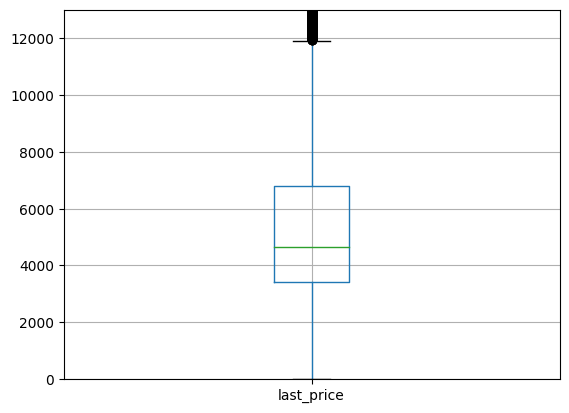

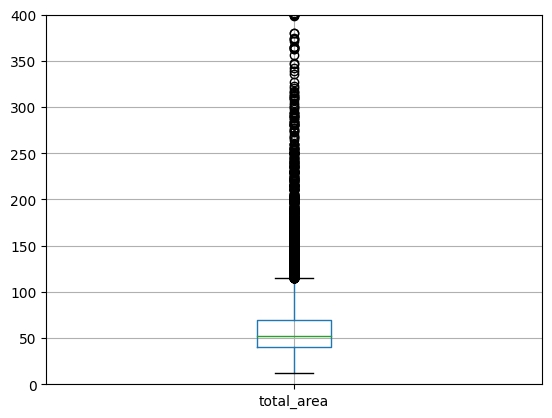

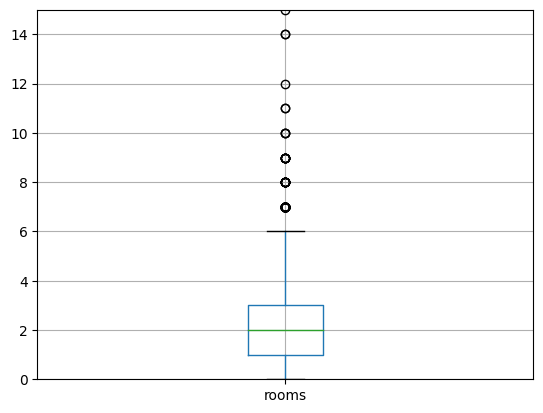

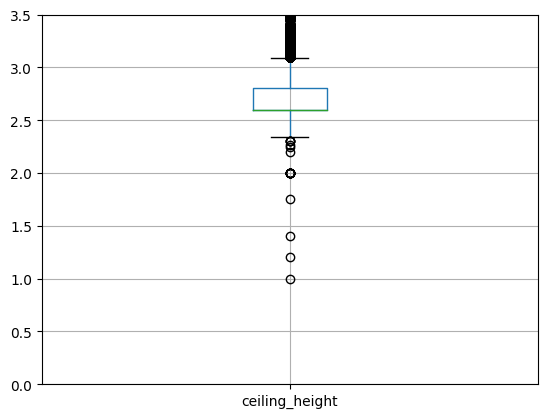

In [39]:
plt.ylim(0, 13000)
data.boxplot(column='last_price')
plt.show()

plt.ylim(0, 400)
data.boxplot(column='total_area')
plt.show()

plt.ylim(0, 15)
data.boxplot(column='rooms')
plt.show()

plt.ylim(0, 3.5)
data.boxplot(column='ceiling_height')
plt.show()

Обозначим границы:
- для `last_price` до 12 000 тр.
- для `total_area` 20 - 125 м2.
- для `rooms` 1 - 6 комнат
- для `ceiling_height` 2,3 - 3,2 м.

Построим гистаграммы:

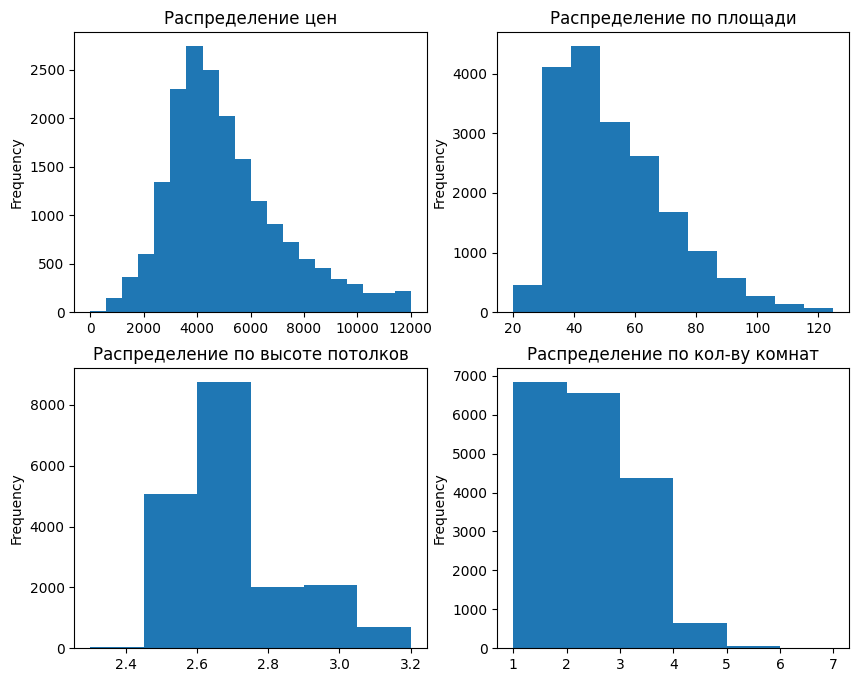

In [148]:
plt.figure(figsize=[10, 8])

plt.subplot(2, 2, 1)
data['last_price'].plot(kind='hist', bins = 20, title='Распределение цен', range=(0, 12000))

plt.subplot(2, 2, 2)
data['total_area'].plot(kind='hist', bins = 11, title='Распределение по площади', range=(20, 125))

plt.subplot(2, 2, 3)
data['ceiling_height'].plot(kind='hist', bins = 6, title='Распределение по высоте потолков', range=(2.3, 3.2))

plt.subplot(2, 2, 4)
data['rooms'].plot(kind='hist', bins = 6, title='Распределение по кол-ву комнат', range=(1, 7))
plt.show()

Очистим дата фрейм от выбивающихся значений:
- для last_price до 12 000 тр.
- для total_area 20 - 125 м2.
- для rooms 1 - 6 комнат
- для ceiling_height 2,3 - 3,2 м.

In [41]:
data = data.query('last_price <= 12000 and 20 < total_area <= 125 and rooms <= 6 and 2.3 <= ceiling_height <= 3.2')

<h3>Ответ на коментарий<a class="tocSkip"></h3>

1. На квантили 25 и 75 % я конечно же не ориентировался. Это я понимаю. Ориентировался я как раз на границы 0, 100, из теории сказано что за этими границами лежат выбросы.
2. Да, откинута большая часть данных около 10%, Но все логично, мы же рассматриваем данные исходя из одной категории основной, массовый сегмент. Нас интересуют объекты массового сегмента. Эксклюзивные объекты будут искажать выводы. Например:
 - Основная масса кварир имеет площадь до 125м2. Все что выше это либо коммерция, Либо Дом, либо экскулюзивный вариант очень богатого человека. Либо выброс.
 - Высота потолков более 3.2 Это также вероятно коммерция либо выброс(или ошибка в выгрузке)
 - Более 6 комнат это скорее всего либо коттедж, либо эксклюзивный вариант за 300млн, либо выброс.
 
3. Не понимаю, что нам даст если мы по 5% отбросим с обеих сторон?

Общий вывод:
- Большинство квартир продаются имеют стоимость от 3х до 6и млн.р.
- Имеют площадь от 30 до 50квм. Большинство продается квартир площадью 40квм
- В большинстве квартиры с высотой потолка 2,6м. есть пик на 3м - оно и понятно, в Питере много Сталинских домов и домов построенных до революции.
- Самый многочисленные и ликвидные квартиры имеют 1-2 комнаты.5-6 комнат уже эксклюзив.

### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_zone
1,7,3350,40.4,2018-12-04,1,2.60,11.0,18.6,1,NaN,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196,56.0,2015-08-20,2,2.60,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,кольцо_2
4,2,10000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,кольцо_1
6,6,3700,37.3,2017-11-02,1,2.60,26.0,10.6,6,NaN,...,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,область
7,5,7915,71.6,2019-04-18,2,2.60,24.0,NaN,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,кольцо_2


- [x] цена одного квадратного метра;
- [x] день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- [x] месяц публикации объявления;
- [x] год публикации объявления;
- [x] тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- [x] расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [43]:
data['price_square'] = data['last_price'] / data ['total_area']
data['week_day'] = data['first_day_exposition'].dt.weekday

Отдельно создадим столбец с текстовым наименование дня недели

In [44]:
weekdays_list = {0:'Пн', 1:'Вт', 2:'Ср', 3:'Чт', 4:'Пт', 5:'Сб', 6:'Вс',}
data['week_day_text'] = data['week_day'].map(weekdays_list)

In [45]:
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Определим тип этажа, создадим столбец 'floor_category' и пропишем функцию:

In [46]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [47]:
data['floor_type'] = data.apply(floor_category, axis=1)

Расстояние в км до центра города. Создаем отдельный столбец 'centre_km'

In [48]:
data['centre_km'] = round(data[data['cityCenters_nearest'].notnull()]['cityCenters_nearest'] / 1000)

In [49]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,category_zone,price_square,week_day,week_day_text,month,year,floor_type,centre_km
1,7,3350,40.4,2018-12-04,1,2.60,11.0,18.6,1,NaN,...,NaN,81.0,область,82.920792,1,Вт,12,2018,первый,19.0
2,10,5196,56.0,2015-08-20,2,2.60,5.0,34.3,4,NaN,...,574.0,558.0,кольцо_2,92.785714,3,Чт,8,2015,другой,14.0
4,2,10000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,кольцо_1,100.000000,1,Вт,6,2018,другой,8.0
6,6,3700,37.3,2017-11-02,1,2.60,26.0,10.6,6,NaN,...,NaN,155.0,область,99.195710,3,Чт,11,2017,другой,19.0
7,5,7915,71.6,2019-04-18,2,2.60,24.0,NaN,22,NaN,...,NaN,NaN,кольцо_2,110.544693,3,Чт,4,2019,другой,12.0


In [50]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition',
 'category_zone',
 'price_square',
 'week_day',
 'week_day_text',
 'month',
 'year',
 'floor_type',
 'centre_km']

### Проведите исследовательский анализ данных

In [51]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_zone', 'price_square',
       'week_day', 'week_day_text', 'month', 'year', 'floor_type',
       'centre_km'],
      dtype='object')

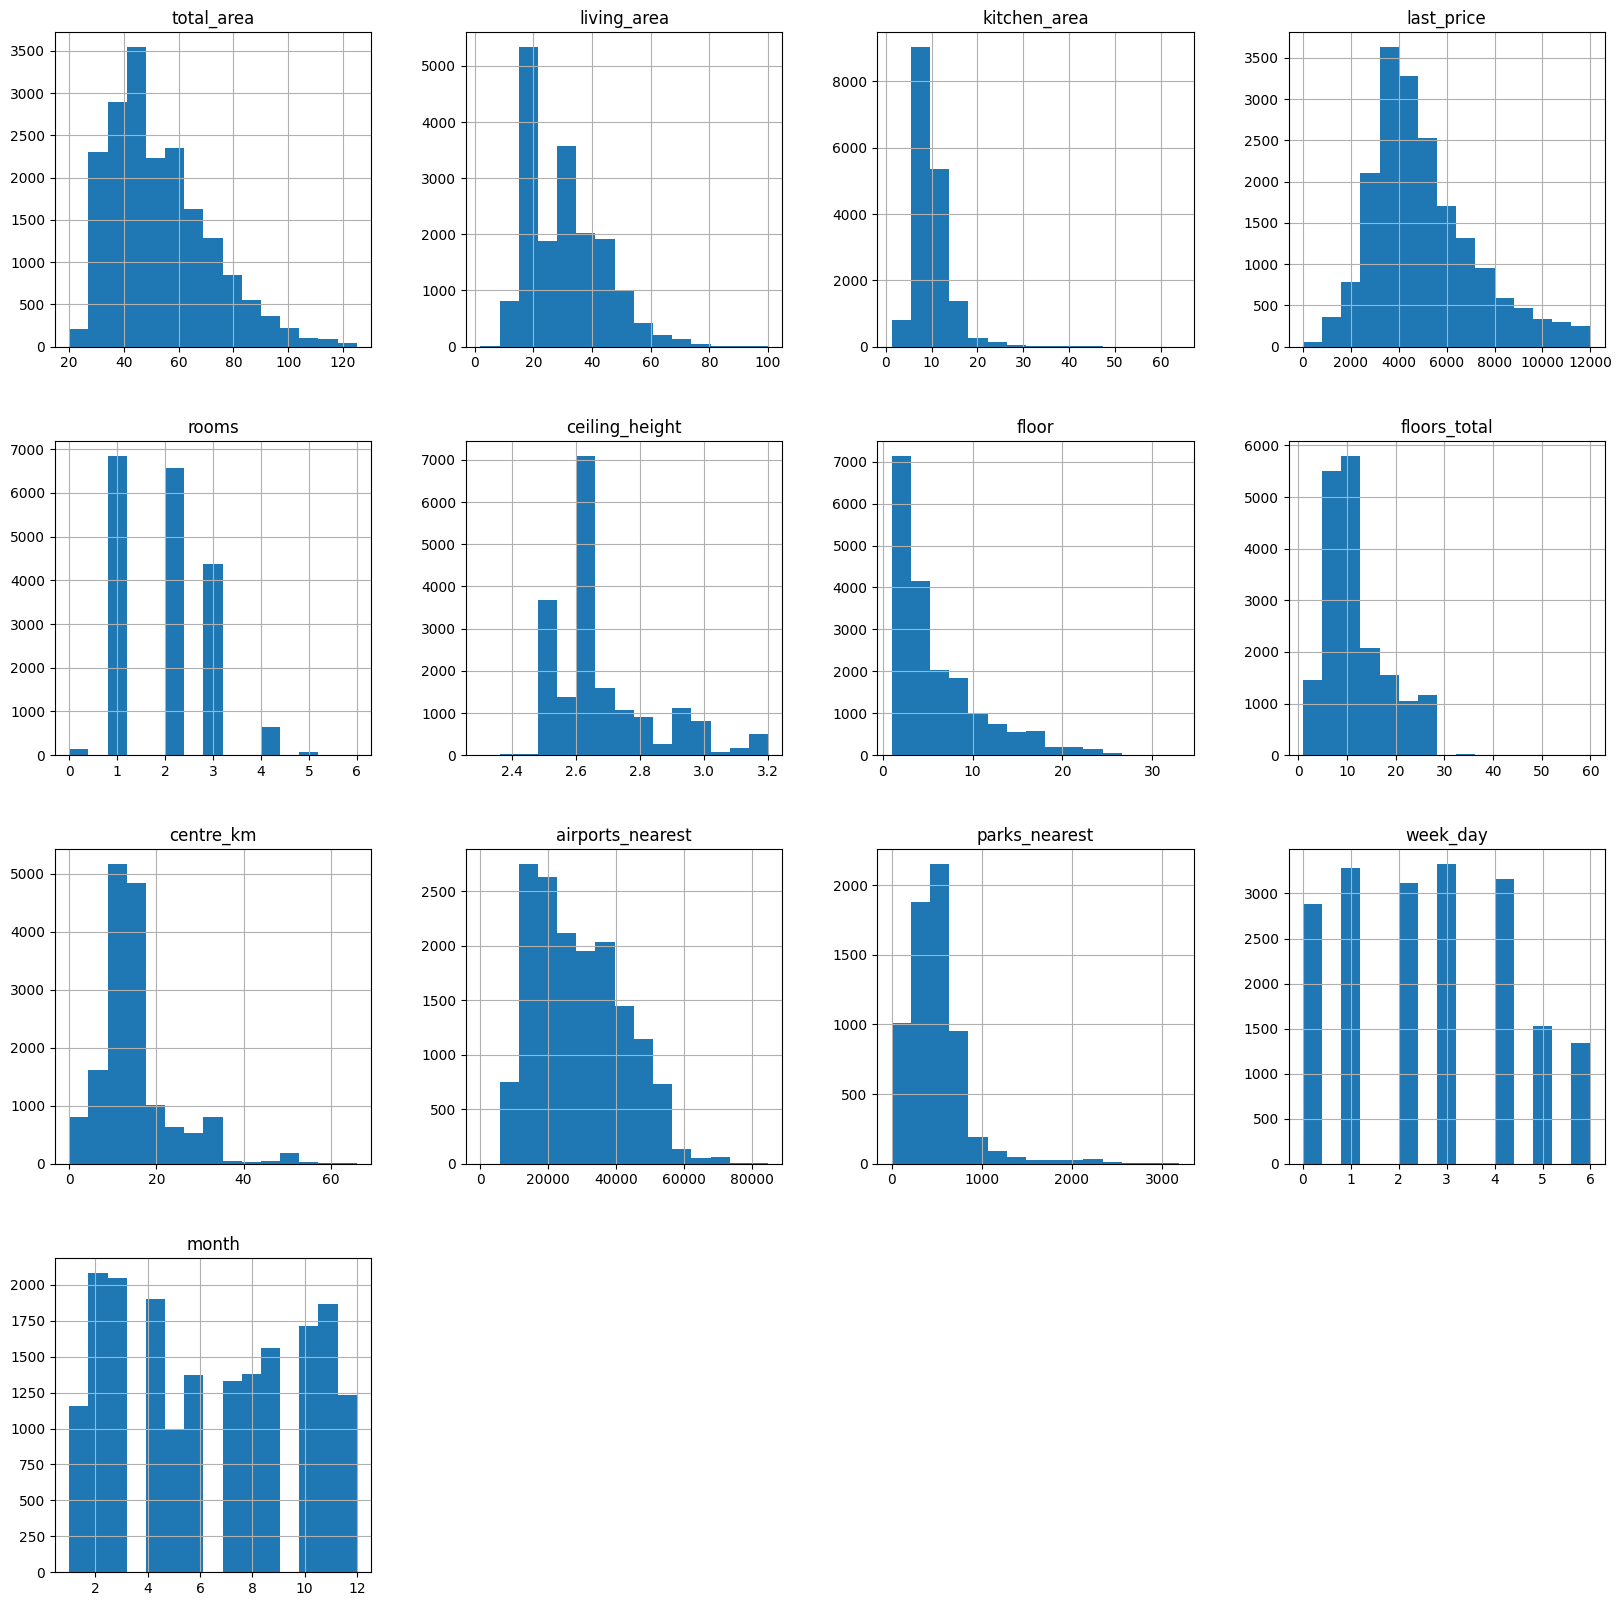

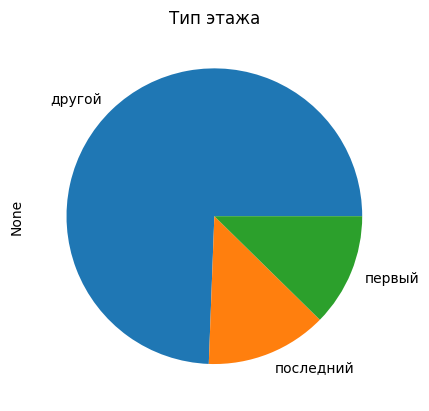

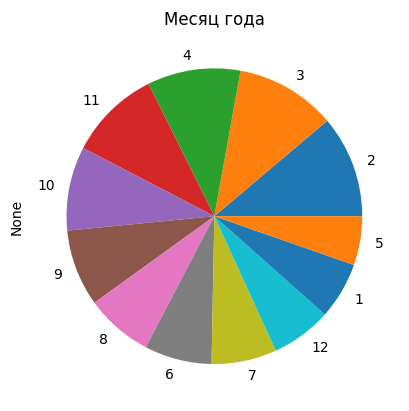

In [52]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms',
      'ceiling_height', 'floor', 'floor_type', 'floors_total', 'centre_km',
      'airports_nearest', 'parks_nearest', 'week_day', 'month']].hist(bins=15, figsize=(20, 20))
plt.show()

data.value_counts('floor_type').plot(kind='pie', title='Тип этажа')
plt.show()
data.value_counts('month').plot(kind='pie', title='Месяц года')
plt.show()

<h3>Ответ<a class="tocSkip"></h3>
    
Ошибка техническая. В процессе выполнения исправлял ее, но видимо сохранение не прошло. Вывод сделан исходя из гистограммы.

Самые массовый сегмент квартир на рынке в продаже выглядит так:
- `total_area` Общая площадь 40-45 м2, 
- соответственно жилая площадь `living_area` около 19квм.
- Кухни стандартные `kitchen_area` 8 - 10 м2
- Стоимость массового сегмента - `last_price` 3-4 млн.р.
- Соответственно это 1-2 комнатные квартиры `rooms`
- Большая доля квартир с потолком 2.6 - 2.6 м `ceiling_height`
- Очень много в продаже недвижимости на 1м этаже `floor` это понятно, потому как продать 1й этаж не так просто. + Вероятно много объявлений по продаже коммерческих помещений,
- В основном в продаже квартиры в домах, этажностью `floors_total` 5 - 11 этажей.
- Большинство квартир проадется на удалении 10 - 17км от центра. `centre_km` Это как раз в пределах КАД, спальные районы.
- Расстояние до аэропорта в большинстве объектов 10 20 км. `airports_nearest`
- Квартиры у парка - 500м. `parks_nearest`
- В продаже квартиры выклыдвают в основном в будние дни `week_day` и чаще всего начинают продажу в `month` Январе-Фефрале, а в июне люди менее мотивированны к продаже.
- Первые и последние этажи составляют 45% от всех объектов.`floor_type`

Изучим, как быстро продавались квартиры (столбец days_exposition).
- [x] Постройте гистограмму.
- [x] Посчитайте среднее и медиану.
- [x] В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

Строим гистограмму `days_exposition`

<AxesSubplot:>

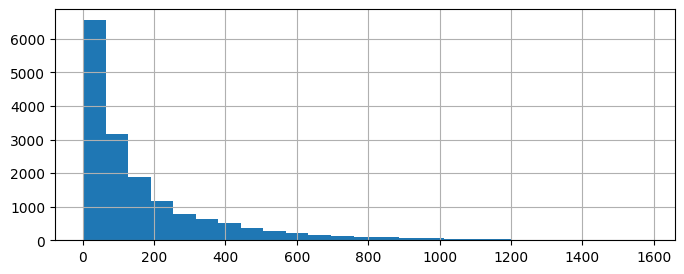

In [143]:
data['days_exposition'].hist(bins=25, figsize=(8, 3))

In [54]:
data['days_exposition'].agg({'mean','median'}) # Считаем среднее и медиану

mean      174.822179
median     92.000000
Name: days_exposition, dtype: float64

Вывод:
- Обычно продажа занимает 92 дня (Учитываем значение median) Значение среднего кол-ва дней. На среднее значение сильно влияют те объявления которые продаюся по 3 года. 
- По условиям яндекс.Недвижимость https://yandex.ru/support/realty/paid.html Объявление не может находится вечно. То есть если его не продлять - оно удаляется. Поэтому исключим тот факт, что объект продан, а объявление висит на площадке 3 года. Примем тот факт, что это реальные продавцы. Просто очень с не аэдекватной ценой.
- Большинство объектов были проданы за 30.
- Быстрыми считаем продажу до 1-го месяца. До 3-х месяцев (Стандартная) выше 3х - долгая.

<h3>Вопрос<a class="tocSkip"></h3>
    Не совсем понял. Оси подписать?

Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
- [x] общей площади;
- [x] жилой площади;
- [x] площади кухни;
- [x] количества комнат;
- [x] этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

Коэффициент корреляции общая площадь/стоимость равен: 0.7192618047146471


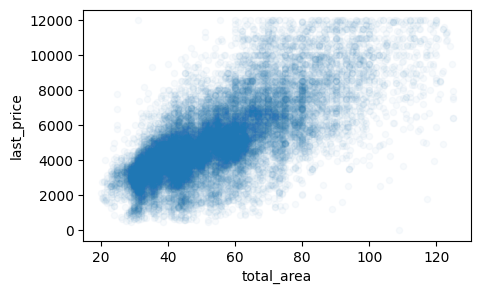

In [134]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, figsize=(5,3)) # Зависимость полной стоимости от общей площади
print('Коэффициент корреляции общая площадь/стоимость равен:', data['total_area'].corr(data['last_price']))

Коэффициент корреляции жилая площадь/стоимость равен: 0.586453585278497


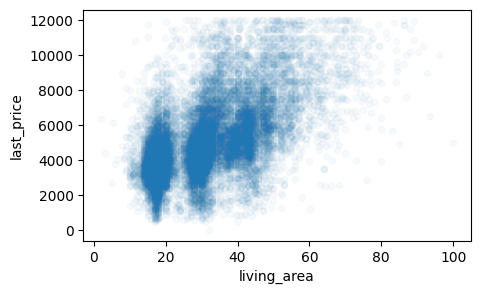

In [135]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03, figsize=(5,3)) # Зависимость полной стоимости от жилой площади
print('Коэффициент корреляции жилая площадь/стоимость равен:', data['living_area'].corr(data['last_price']))

Коэффициент корреляции площадь кухни/стоимость равен: 0.4985530196628937


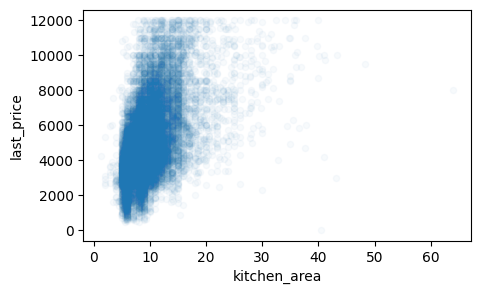

In [136]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03, figsize=(5,3)) # Зависимость полной стоимости от площади кухни
print('Коэффициент корреляции площадь кухни/стоимость равен:', data['kitchen_area'].corr(data['last_price']))

In [58]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_zone', 'price_square',
       'week_day', 'week_day_text', 'month', 'year', 'floor_type',
       'centre_km'],
      dtype='object')

Коэффициент корреляции кол-во комнат/стоимость равен: 0.4521216857018192


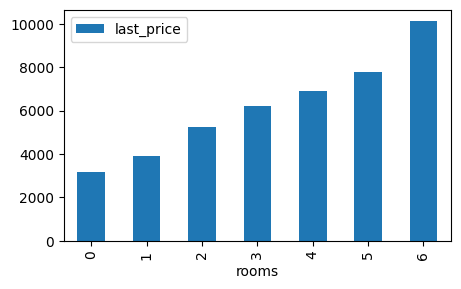

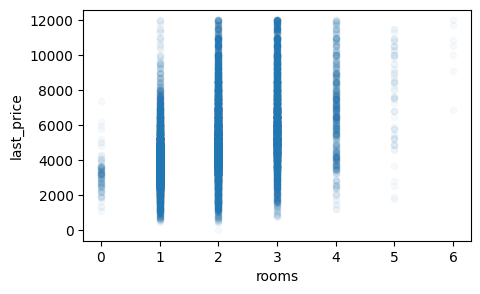

In [138]:
data.pivot_table(index='rooms', values='last_price').plot(kind='bar', figsize=(5,3))
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03, figsize=(5,3)) # Зависимость полной стоимости от кол-ва комнат
print('Коэффициент корреляции кол-во комнат/стоимость равен:', data['rooms'].corr(data['last_price']))

<AxesSubplot:xlabel='floor_type'>

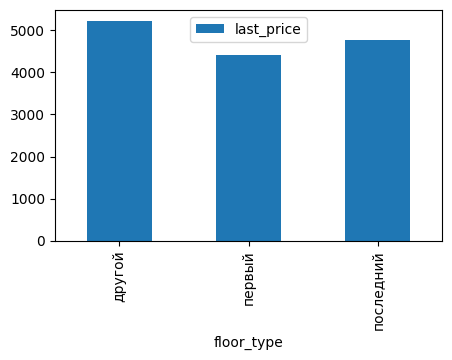

In [139]:
data.pivot_table(index='floor_type', values='last_price').plot(kind='bar', figsize=(5,3))

вывод:
- Зависимость общей площади от стоимости прямая, чем больше площадь, тем больше цена. Об этом говорит положительный коэфф. Корреляции = 0,7
- Зависимость жилой площади от стоимости есть, но небольшая. После 6млн слишком большой разброс. Причиной тому разный класс жилья.
- Зависимость площади кухни от стоимости небольшая. квартира с кухней 10квмб может стоить и 3млн и 8млн.
- Зависимость кол-ва комнат от стоимости прямая, чем больше комнат тем дороже. Но коэфф. корреляции 0,45. Причина тому, разные сегменты жилья. Это отражено на диаграмме рассеивания(2к квартиру можно купить и за 2 млн и за 8)
- По поводу этажа - все логично. Самые не ликвидные варианты(потому и дешевле остальных) это первые этажи. Последний лучше первого(как считают покупатели) но всеравно многие не выбирают последний изза возможных проблем. Самая высокая цена у среднего этажа.

In [61]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_zone', 'price_square',
       'week_day', 'week_day_text', 'month', 'year', 'floor_type',
       'centre_km'],
      dtype='object')

Доработка:

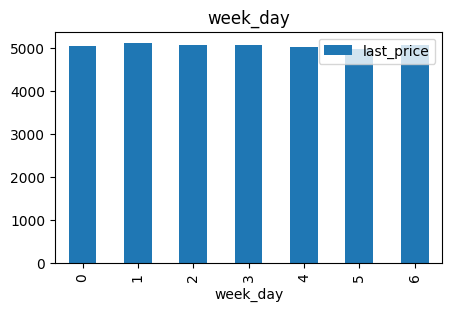

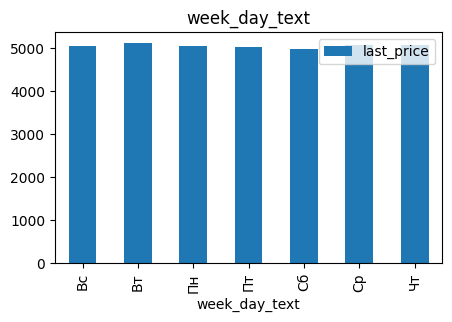

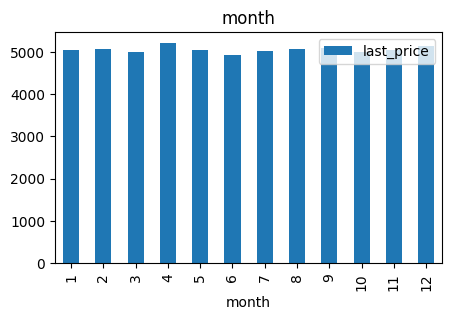

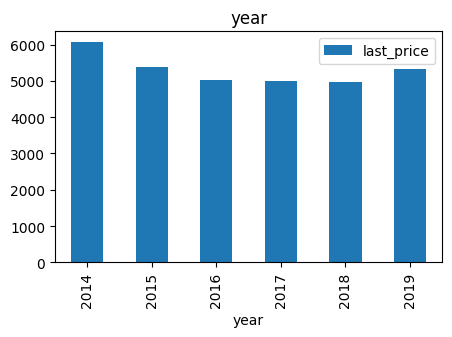

In [128]:
list_1 = ['week_day', 'week_day_text', 'month', 'year']
j = 1

for i in list_1:
    data.pivot_table(index=i, values='last_price').plot(kind='bar', title=i, figsize=(5,3))
    plt.show()

Вывод:
 - Зависимость от дня недели, месяца отсутствует.
 - Зависимость от года имеется, но принять во внимание логически мы не можем. Просто видимо в 2014м году продавалось большое количество дорогих объектов. И например про площадку Яндекс недвижимость многие собственники не знали. С каждым годом, прогрес усиливается, и на яндекс недвижимости стали размещаться все больше риэлторов и собственников. (Я как риэтор это могу сказать, в 14м году, про яндекс недвижимость практически никто не знал)

- [x] Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
- [x] Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Создаем сводную таблицу по названию поселка с значением средней стоимости за м2, назовем `pivot_price_square`

In [63]:
pivot_price_square = data.pivot_table(index='locality_name', 
                                      values='price_square', aggfunc='mean') # Сводная таблица по цене за м2

In [64]:
print('Населенный пункт с максимальной ценой за м2')
print(pivot_price_square.reset_index(drop=False).max())
print()
print('Населенный пункт с минимальной ценой за м2')
print(pivot_price_square.reset_index(drop=False).min())

Населенный пункт с максимальной ценой за м2
locality_name    село Русско-Высоцкое
price_square               107.121681
dtype: object

Населенный пункт с минимальной ценой за м2
locality_name         None
price_square     11.688312
dtype: object


Создаем сводную таблицу по названию поселка с колличеством строк, `locality_name_count`

In [65]:
# Кол-во объявлений по поселкам
locality_name_count = data.pivot_table(index='locality_name', 
                        values='week_day_text', aggfunc='count').rename(columns={'week_day_text' : 'кол-во объявлений'}) 

Методом join сводим две таблицы в одну:

In [66]:
locality_name_count.join(
    pivot_price_square, 
    how='outer').sort_values(by='кол-во объявлений', 
                                                 ascending= \
                             False).head(10).rename(columns={'price_square' : 'стоимость за 1 м2'}
)

,кол-во объявлений,стоимость за 1 м2
locality_name,,
Санкт-Петербург,13375,105.525461
поселок Шушары,435,78.564129
Колпино,332,75.211594
Пушкин,329,100.197882
поселок Парголово,326,90.332168
Всеволожск,266,67.259679
поселок Мурино,216,87.067237
Петергоф,194,83.537260
Красное Село,174,72.005410


Вывод:
- Как и ожидалось, лидирует Санкт-Петербург, по стоимости за м2 и по количеству объявлений. Оно и понятно, 2й город россии по количеству населения. Квартир требуется соответственно больше на рынке
- В Топ 10 входят крупные районы(города) Ленинсградской области.
- Самые дешевые квариры в Всеволжске. Квартиры там ценятся меньше всего. (Не подойдет для инвестирования, говорю как риэлтор по Спб)

---

- Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [67]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_zone', 'price_square',
       'week_day', 'week_day_text', 'month', 'year', 'floor_type',
       'centre_km'],
      dtype='object')

In [91]:
data_spb = data.query('locality_name == "Санкт-Петербург"') # фильтруем таблицу по города Санкт-петербург.

data_spb_pivot_centr = data_spb.pivot_table(
    index='centre_km', values='price_square', aggfunc='mean'
).reset_index(drop=False)

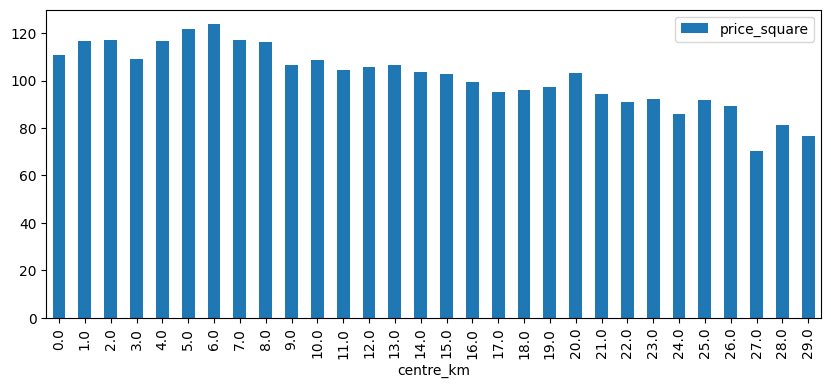

In [92]:
data_spb_pivot_centr.plot(x='centre_km', y='price_square', kind='bar', figsize=(10,4));

Вывод: Логично, чем дальше от центра, тем стоимость за м2 дешевле. Все зависит конечно от конкретной квартиры и состоянии.

Дополнительно, нет в задании, но необходимо для вывода визуализировать зависимость стоиомости за м2 от кол-ва комнат:

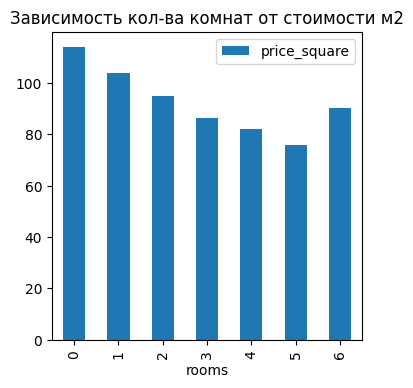

In [88]:
data.pivot_table(index='rooms', values='price_square').plot(
    kind='bar', title='Зависимость кол-ва комнат от стоимости м2', figsize=(4,4)
);

---
### Общий вывод

#### Задача проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

- По воводу данных:
  - Для площадки недвижиомсти исправить ошибки, которые явились причиной отсутствия названия поселения, расстояния до центра, расстояния до аэропорта
  - Реализовать базу адресов, чтобы не образовывались неявные дубликаты такие как "городской поселок" и "поселок городского типа"
  - Пришлось отсеивать много выбросов. Дополнително должна быть характеристика объекта (Жилое, коммерция, склад) Получилось много объектов высокой квадратуры и с очень высокими потолками.
---
- Интересные закономерности на рынке недвижимости:
  - Стоимость за м2 самая дорогая в центре и становится меньше по удалению от центра
  - Этажность, как и высота потолков зависит от зоны города. Прослеживается истоическая культурная и архитектурная разница. Раньше строили высокие полотки и 5-6 этаежей, сейчас строят высотные новостройки.
  - Стоимость за м2 самая дорогая для 1-2 комнатных квартир и становится меньше с увеличением комнатности квартиры.
  - Стоимость квартиры зависит от количнства комнат. чем больше комнат тем больше стоимость. (Логичнее некуда)
  - Первый и последний этаж ценится и стоит меньше чем средний. (Первый боятся покупать из-за подвала, последний изза того что крыша может протекать. Это страх из советского времени. Сейчас даже покупая новостройку, людям страшно. Покупателю сложно объяснить что подвалов сейчас не строят, а последний этаж - не жилой(технический))
  - Стоимость зависит на прямую от количества квадратов квартиры, в частности жилой площади. (Логичный вывод)
  - Стоимость не зависит от дня недели, месяца, года когда выложили объект в продажу.
  - Быстрыми считаем продажу до 1-го месяца. До 3-х месяцев (Стандартная) выше 3х - долгая.
---

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод